In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tips.csv')
df

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
del df['Unnamed: 0']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


# Data Visualization

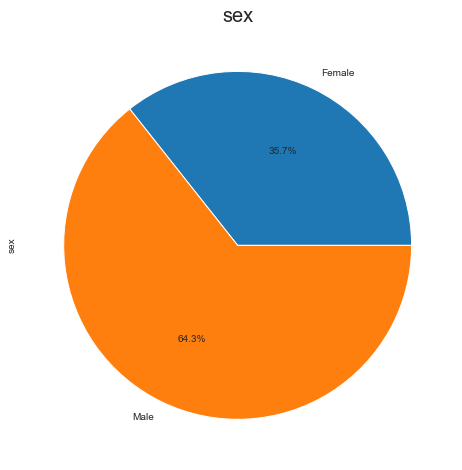

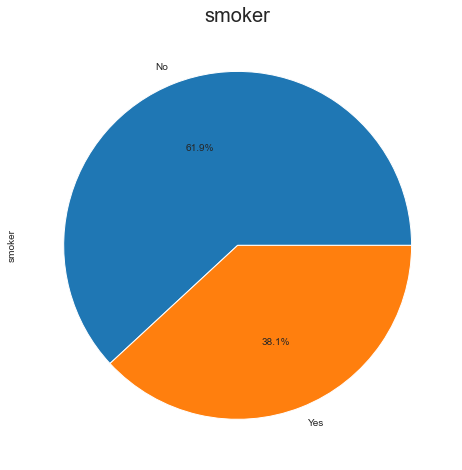

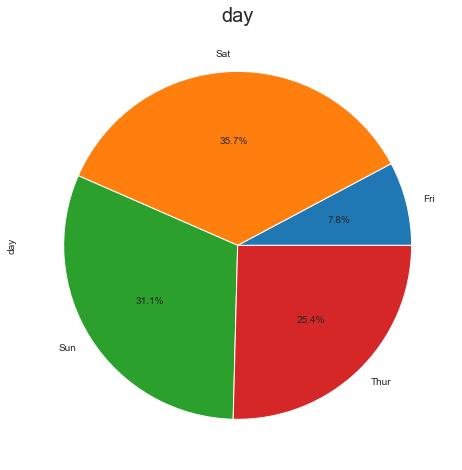

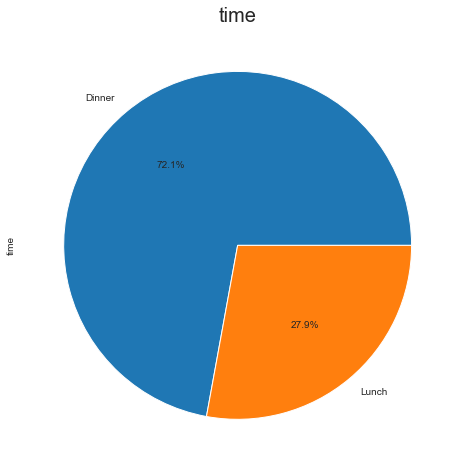

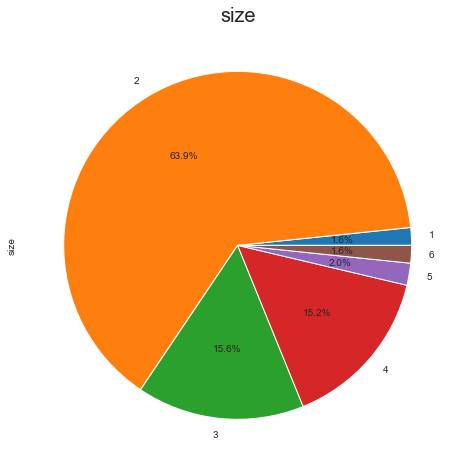

In [6]:
sns.set_style('darkgrid')
for col in ['sex', 'smoker', 'day', 'time', 'size']:
    plt.figure(figsize = (8, 8))
    data = df.groupby(col)[col].count()
    data.plot.pie(autopct="%.1f%%")
    plt.title(col, fontsize = 20)
    plt.show()

Among the customers, male customers visit restaurant more than female customers.  
Almost one-third of the customers are smokers.  
Restaurant is busy mostly on Saturdays, Sundays and Thursdays.  
People mostly prefer to eat dinner in our restaurant.  
Restaurant is famous among couples and then among small families with 3 or 4 members.  

In [7]:
from warnings import filterwarnings as fw
fw('ignore')

Text(0.5, 0.98, 'Total Bill and Tip Distribution')

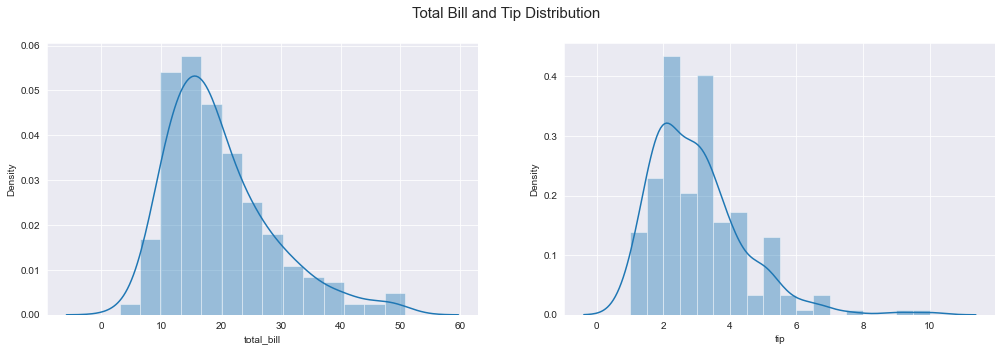

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (17, 5))
sns.distplot(x = df['total_bill'], ax = ax1)
ax1.set_xlabel('total_bill')

sns.distplot(x = df['tip'], ax = ax2)
ax2.set_xlabel('tip')
plt.suptitle('Total Bill and Tip Distribution', fontsize = 15)

Mostly the bill comes out to be in the range 10 to 25  
The tip given by most customers is in the range 2-4

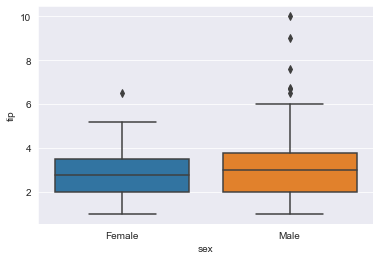

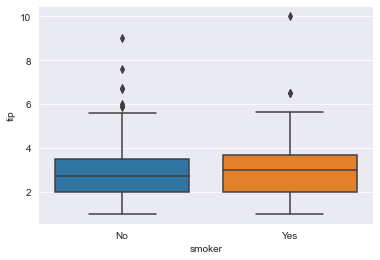

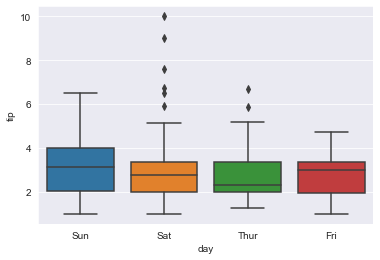

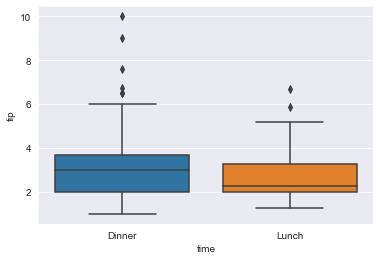

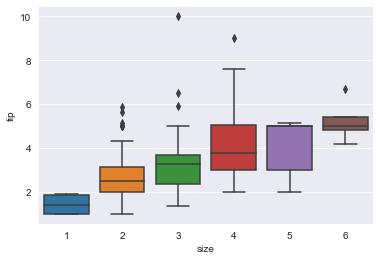

In [9]:
for col in ['sex', 'smoker', 'day', 'time', 'size']:
    sns.boxplot(x = df[col], y = df['tip'])
    plt.show()

A lot of outliers lie on the upper side of the all the graphs(tip > 6), so remove them. 

In [10]:
df.drop(df[df['tip'] > 6].index, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  237 non-null    float64
 1   tip         237 non-null    float64
 2   sex         237 non-null    object 
 3   smoker      237 non-null    object 
 4   day         237 non-null    object 
 5   time        237 non-null    object 
 6   size        237 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ KB


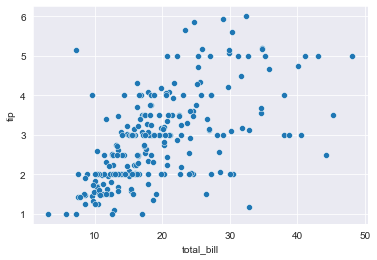

In [12]:
sns.scatterplot(x = df['total_bill'], y = df['tip'])

Somewhat linear relationship  

# Data Preprocessing

In [13]:
df = df.astype({"sex": 'category', "smoker": 'category', "day":'category', "time": 'category'})

In [14]:
df['sex'] = df[['sex']].apply(lambda x: x.cat.codes)
df['smoker'] = df[['smoker']].apply(lambda x: x.cat.codes)
df['day'] = df[['day']].apply(lambda x: x.cat.codes)
df['time'] = df[['time']].apply(lambda x: x.cat.codes)

In [15]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


# Correlation Matrix

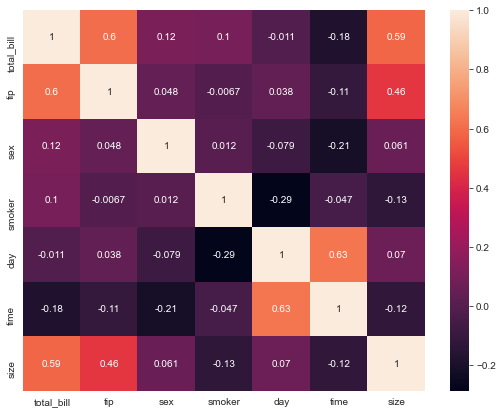

In [16]:
plt.figure(figsize = (9, 7))
sns.heatmap(df.corr(), annot = True)

No features are correlated with each other

# Model

In [17]:
x = df.drop('tip', axis = 1)
y = df['tip']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .25, random_state = 0)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression().fit(xtrain, ytrain)

In [22]:
model.score(xtest, ytest)*100

25.225204093477526

In [23]:
model.score(xtrain, ytrain)

0.4196251252101708